<a href="https://colab.research.google.com/github/francianerod/PROJETOS-SoulCode/blob/main/Projeto_AI_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING COM PYTHON**

Escola: SoulCode Academy

Curso: Inteligência Artificial

Período: Módulo 2

Assunto: Problema de Classificação

Professor: Franciane Rodrigues

## **Problemas de Classificação**

In [ ]:
# Instalação de pacote
!pip install lazypredict

In [ ]:
# Abertura de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

Informações da Base de Dados

O hospital de Cleveland abriu sua base dados de pacientes e a a estrutura do banco de dados foi replicada para outros hospitais, a base contém dados de cada paciente e através desses dados precisamos predizer qual paciente tem ou não tem uma doença cardíaca.

Criadores da Base:

1. Instituto Húngaro de Cardiologia. Budapeste: Andras Janosi, MD
2. Hospital Universitário, Zurique, Suíça: William Steinbrunn, MD
3. Hospital Universitário, Basileia, Suíça: Matthias Pfisterer, MD
4. Centro Médico VA, Long Beach e Cleveland Clinic Foundation: Robert Detrano, MD, Ph.D.

Dicionário de dados

*  age: a idade da pessoa em anos
*  sex: o sexo da pessoa (1 = masculino, 0 = feminino)
*  cp: Dor no peito (Valor 0: angina típica, Valor 1: angina atípica, Valor 2: dor não anginal, Valor 3: assintomático)
*  trestbps: pressão arterial em repouso da pessoa (mm Hg na admissão no hospital)
*  chol: Medição do colesterol da pessoa em mg / dl
*  fbs: O açúcar no sangue em jejum da pessoa (> 120 mg / dl, 1 = verdadeiro; 0 = falso)
*  restecg: Medida eletrocardiográfica em repouso (0 = normal, 1 = com anormalidade da onda ST-T, 2 = mostrando hipertrofia * * * provável ou definitiva do ventrículo esquerdo pelo critério de Estes)
*  thalach: A frequência cardíaca máxima da pessoa alcançada
*  exang: Angina induzida pelo exercício (1 = sim; 0 = não)
*  oldpeak: depressão do ST induzida pelo exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG. Veja mais aqui)
* slope: a inclinação do pico do segmento ST do exercício (Valor 1: ascendente, Valor 2: plano, Valor 3: descendente)
*  ca: O número de navios principais (0-3)
*  thal: um distúrbio sanguíneo chamado talassemia (3 = normal; 6 = defeito fixo; 7 = defeito reversível)
*  target: Doença cardíaca (0 = não, 1 = sim)

In [ ]:
# Use o método read_csv() para carregar o arquivo CSV do link do GitHub
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv")

In [ ]:
# Renomeando colunas
df.rename(columns={'age':'idade',
                   'sex':'sexo',
                   'cp':'dor_no_peito',
                   'trestbps':'pressao_arterial',
                   'chol': 'medicao_colesterol',
                   'fbs': 'acucar_sangue',
                   'restecg':'med_eletrocardiografica',
                   'thalach':'freq_cardio_max',
                   'exang':'angina_induzida_exercicio',
                   'oldpeak':'depressao_ST_induzida',
                   'slope':'inclinacao_seg_ST',
                   'ca':'n_vasos_principais',
                   'thal':'talassemia',
                   },inplace=True)



In [ ]:
# Visualização da base de dados
df.head()

,idade,sexo,dor_no_peito,pressao_arterial,medicao_colesterol,acucar_sangue,med_eletrocardiografica,freq_cardio_max,angina_induzida_exercicio,depressao_ST_induzida,inclinacao_seg_ST,n_vasos_principais,talassemia,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [ ]:
# Exportação no Google Drive.
df.to_csv('class_cardiaco.csv', index=False)

In [ ]:
# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   idade                      303 non-null    int64  
 1   sexo                       303 non-null    int64  
 2   dor_no_peito               303 non-null    int64  
 3   pressao_arterial           303 non-null    int64  
 4   medicao_colesterol         303 non-null    int64  
 5   acucar_sangue              303 non-null    int64  
 6   med_eletrocardiografica    303 non-null    int64  
 7   freq_cardio_max            303 non-null    int64  
 8   angina_induzida_exercicio  303 non-null    int64  
 9   depressao_ST_induzida      303 non-null    float64
 10  inclinacao_seg_ST          303 non-null    int64  
 11  n_vasos_principais         303 non-null    int64  
 12  talassemia                 303 non-null    int64  
 13  target                     303 non-null    int64  

### **Análise Exploratória de Dados**

In [ ]:
# Análise exploratória de dados
!pip install ydata-profiling
!pip install --upgrade typing-extensions

In [ ]:
# Importar a função da biblioteca
from ydata_profiling import ProfileReport

# executa a função que gera o relatório
profile = ProfileReport(df, title="ecommerce")

# visualização do relatório no output
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Executa a função que gera o relatório para ver no browser
relatorio = ProfileReport(df, title='cardiaco')
relatorio.to_file(output_file="relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Para ver todas as categorias dos atributos
categorico_val = []
continuo_val = []

# Verificação de dados únicos em cada coluna e separação em dados categóricos e continuos
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

    if len(df[column].unique()) <= 10:
        categorico_val.append(column)
    else:
        continuo_val.append(column)

idade : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sexo : [1 0]
dor_no_peito : [3 2 1 0]
pressao_arterial : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
medicao_colesterol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319

In [ ]:
# Medidas-resumo geral
df.describe()

,idade,sexo,dor_no_peito,pressao_arterial,medicao_colesterol,acucar_sangue,med_eletrocardiografica,freq_cardio_max,angina_induzida_exercicio,depressao_ST_induzida,inclinacao_seg_ST,n_vasos_principais,talassemia,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Gráficos importante: Barras | Setores | Boxplot| Linhas | Dispersão | Histograma | Mapa de Calor

In [ ]:
# Dados categóricos
categorico_val

['sexo',
 'dor_no_peito',
 'acucar_sangue',
 'med_eletrocardiografica',
 'angina_induzida_exercicio',
 'inclinacao_seg_ST',
 'n_vasos_principais',
 'talassemia',
 'target']

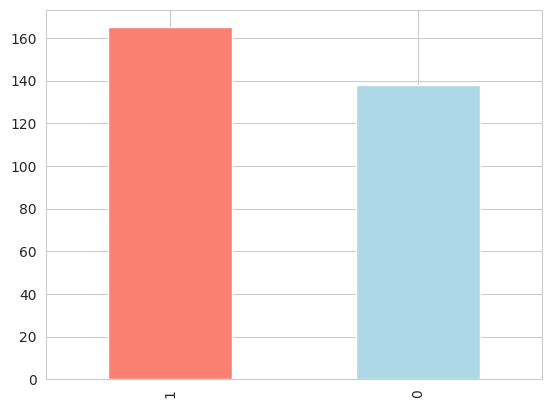

In [ ]:
# Quantidade de pessoas com doenças cardiacas
sns.set_style("whitegrid")
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

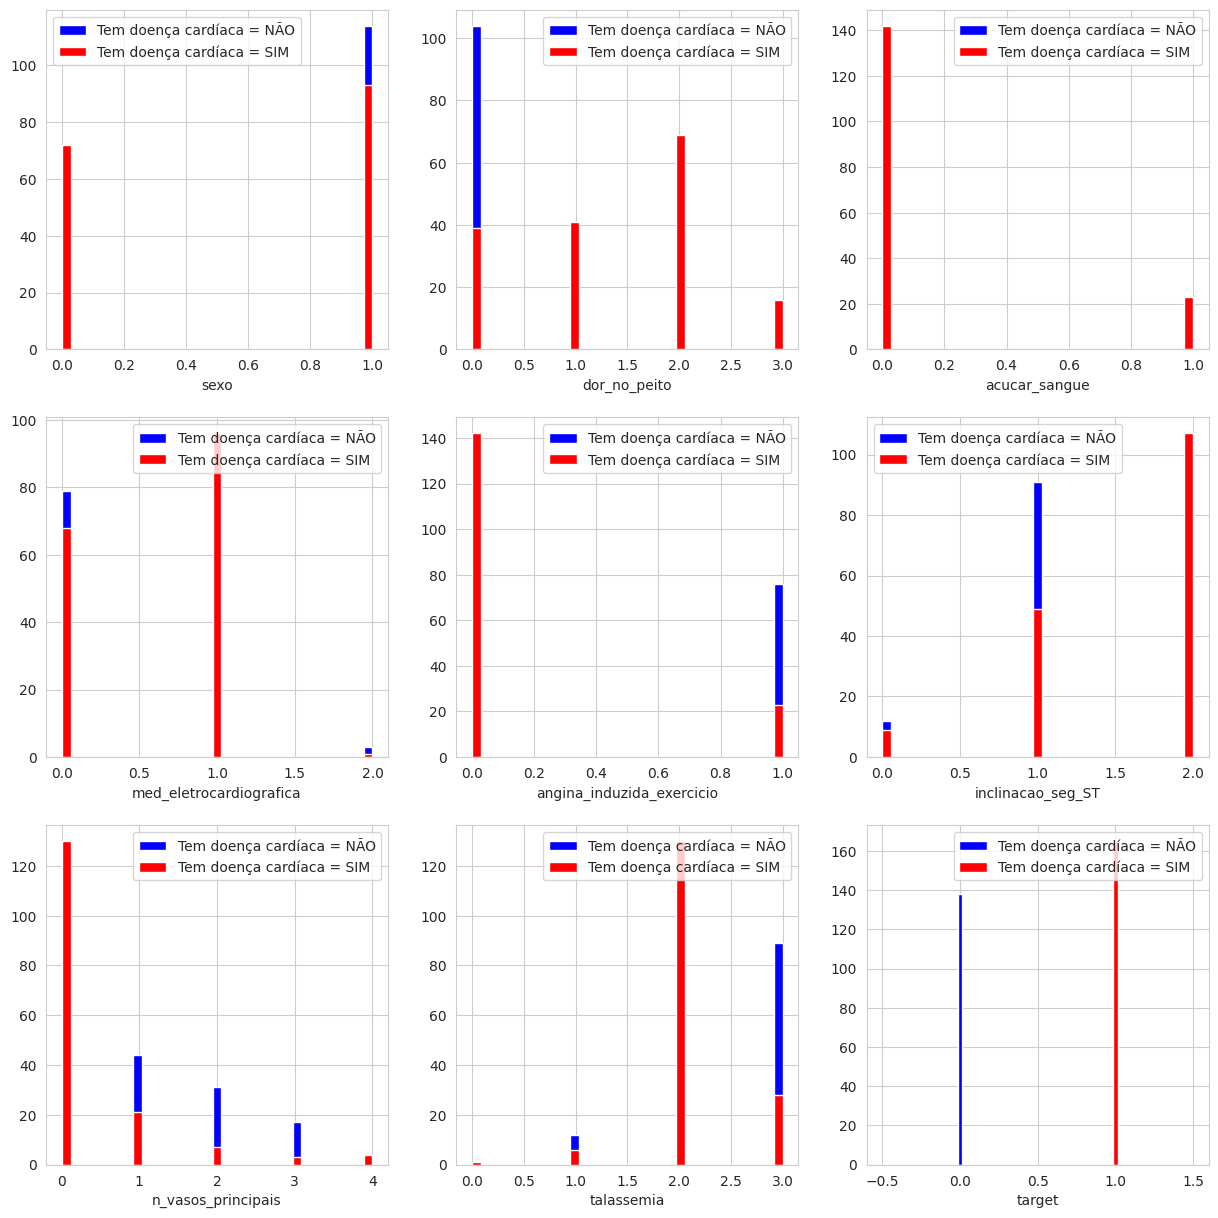

In [ ]:
# Gráfico para dados categóricos: barras
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")

for i, column in enumerate(categorico_val, 1):
    plt.subplot(3, 3, i)

    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Tem doença cardíaca = NÃO')
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Tem doença cardíaca = SIM')

    plt.legend()
    plt.xlabel(column)

In [ ]:
# Dados categóricos
continuo_val

['idade',
 'pressao_arterial',
 'medicao_colesterol',
 'freq_cardio_max',
 'depressao_ST_induzida']

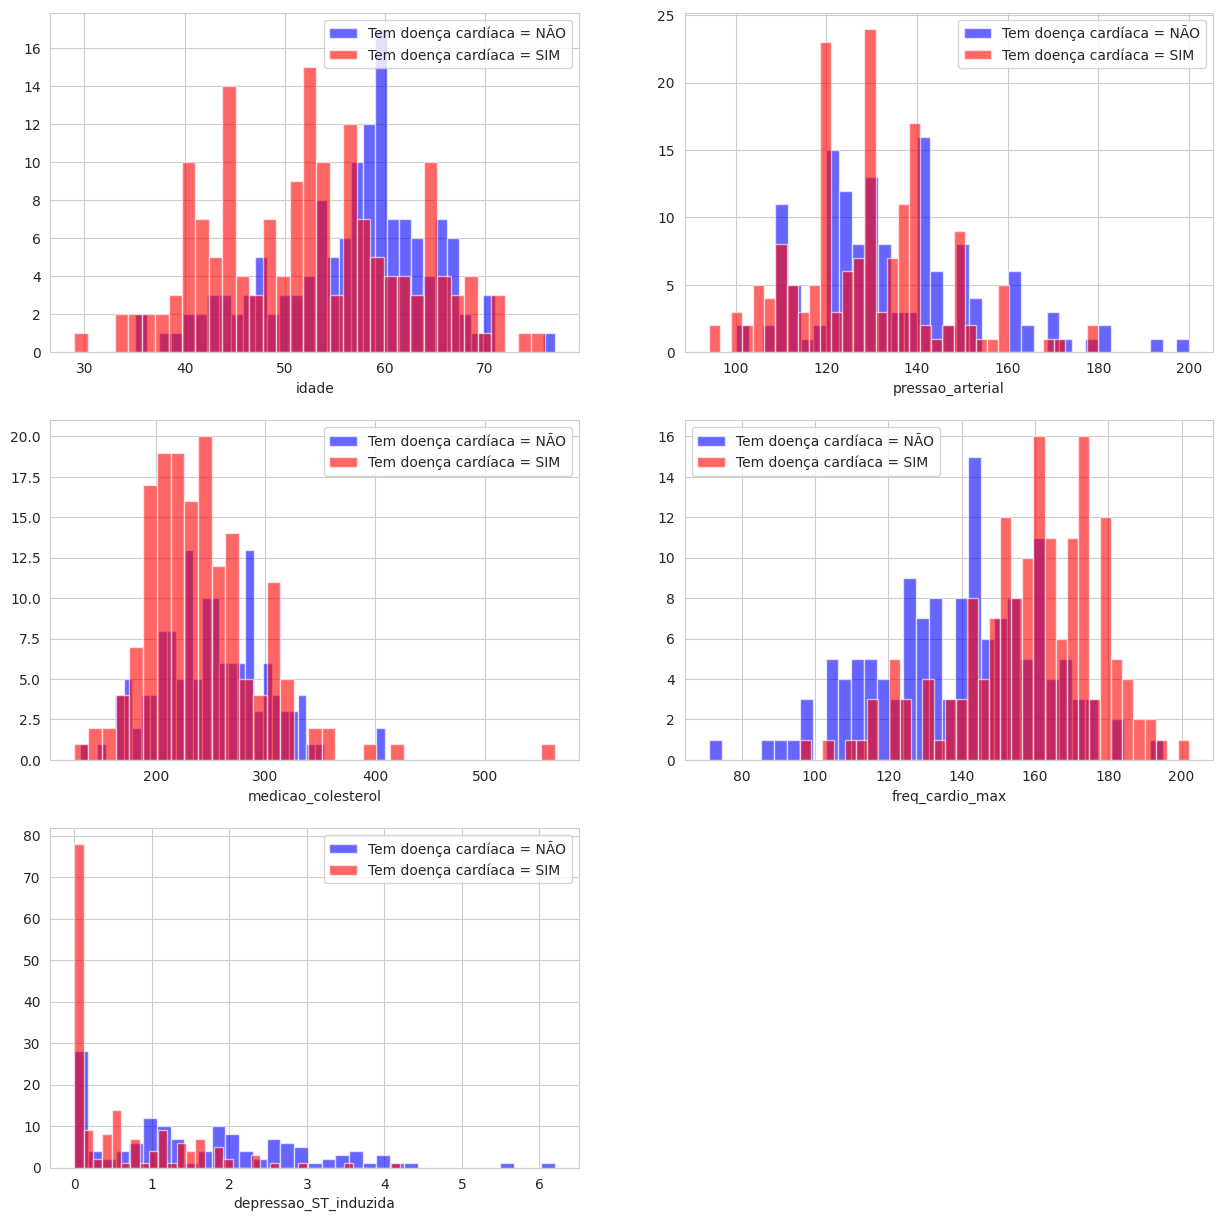

In [ ]:
# Gráfico para dados continuo: histograma
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid")

for i, column in enumerate(continuo_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Tem doença cardíaca = NÃO', alpha = 0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Tem doença cardíaca = SIM', alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

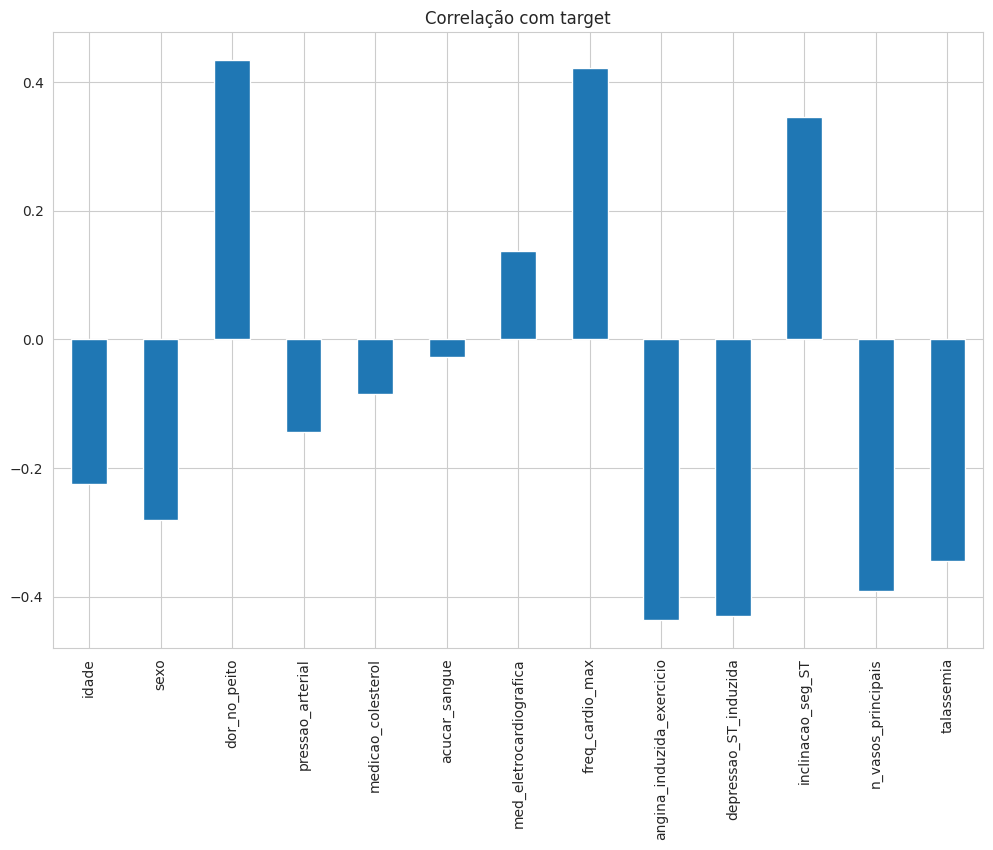

In [ ]:
# Correlação com a variável alvo
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar',
                                                   grid=True,
                                                   figsize=(12, 8),
                                                   title="Correlação com target")
plt.show()

In [ ]:
# Preparando os dados categóricos
categorico_val.remove('target')
dataset = pd.get_dummies(df, columns = categorico_val)

# Cria objeto scaler
scaler = StandardScaler()

# Padronizando dados continuos
col_to_scale = ['idade', 'pressao_arterial', 'medicao_colesterol', 'freq_cardio_max', 'depressao_ST_induzida']

# Adequando a base de dados para machine learning
dataset[col_to_scale] = scaler.fit_transform(dataset[col_to_scale])

In [ ]:
# Visualizando Dataset padronizando
dataset.head()

,idade,pressao_arterial,medicao_colesterol,freq_cardio_max,depressao_ST_induzida,target,sexo_0,sexo_1,dor_no_peito_0,dor_no_peito_1,dor_no_peito_2,dor_no_peito_3,acucar_sangue_0,acucar_sangue_1,med_eletrocardiografica_0,med_eletrocardiografica_1,med_eletrocardiografica_2,angina_induzida_exercicio_0,angina_induzida_exercicio_1,inclinacao_seg_ST_0,inclinacao_seg_ST_1,inclinacao_seg_ST_2,n_vasos_principais_0,n_vasos_principais_1,n_vasos_principais_2,n_vasos_principais_3,n_vasos_principais_4,talassemia_0,talassemia_1,talassemia_2,talassemia_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
# Dataset padronizado e com suas categorias preparadas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        303 non-null    float64
 1   pressao_arterial             303 non-null    float64
 2   medicao_colesterol           303 non-null    float64
 3   freq_cardio_max              303 non-null    float64
 4   depressao_ST_induzida        303 non-null    float64
 5   target                       303 non-null    int64  
 6   sexo_0                       303 non-null    uint8  
 7   sexo_1                       303 non-null    uint8  
 8   dor_no_peito_0               303 non-null    uint8  
 9   dor_no_peito_1               303 non-null    uint8  
 10  dor_no_peito_2               303 non-null    uint8  
 11  dor_no_peito_3               303 non-null    uint8  
 12  acucar_sangue_0              303 non-null    uint8  
 13  acucar_sangue_1     

In [ ]:
# Separando base de dados
X = dataset.copy()
y = df.target

In [ ]:
# Separação da base em Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
# Criando um objeto do pacote Lazy
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None)

In [ ]:
# Ajustando os dados de treinamento e teste
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 25.37it/s]

[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.03
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.04
XGBClassifier,1.00,1.00,1.00,1.00,0.04
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.02
RidgeClassifier,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,0.18
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.02
Perceptron,1.00,1.00,1.00,1.00,0.02
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.03


**PROBLEMAS**

Os resultados perfeitos (1.00) para todas as métricas (Accuracy, Balanced Accuracy, ROC AUC, F1 Score) em diferentes modelos de classificação, como os apresentados no seu conjunto de resultados, podem indicar uma série de problemas ou situações que devem ser examinadas com cuidado. Aqui estão algumas possíveis explicações para tais resultados:

*  Conjunto de Dados Pequeno ou Facilmente Separável:

Se o conjunto de dados for pequeno ou as classes forem facilmente separáveis, os modelos podem se ajustar completamente aos dados de treinamento, levando a resultados perfeitos. No entanto, essa perfeição pode não se traduzir em um modelo útil para dados futuros.

*  Problema Mal-Definido ou Dados Ruidosos:

O problema pode não estar bem definido, ou os dados podem conter ruído que faz com que os modelos se ajustem de forma enganosa aos dados de treinamento.

*  Desbalanceamento de Classes:

Se as classes estiverem desbalanceadas, um modelo pode atingir altas métricas ao simplesmente prever a classe majoritária, especialmente se a métrica de acurácia for usada.

*  Avaliação Inadequada:

Dependendo do problema e do contexto, algumas métricas podem não ser apropriadas. É importante escolher métricas de avaliação que estejam alinhadas com os objetivos da tarefa.

*  Configuração do Lazy Predict:

O Lazy Predict pode usar uma configuração padrão que não é adequada para o seu conjunto de dados específico. Pode ser necessário ajustar hiperparâmetros ou personalizar a configuração para melhor se adequar ao seu problema.

*  Problema com a Divisão Treinamento/Teste:

A divisão entre conjuntos de treinamento e teste pode estar causando uma performance irrealista. Certifique-se de que a divisão seja feita de maneira adequada e que os conjuntos de treinamento e teste sejam representativos dos dados reais.

In [ ]:
# Função Classificação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Resultado do treinamento:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Resultado do teste:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Relatório de classificação:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
# Separando base de dados
X = dataset.copy()
y = df.target

In [ ]:
# Separação da base em Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Exemplo: Algoritmo de regressão logistica: ajuda a fazer previsões sobre um resultado binário
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 100.00%
_______________________________________________
Relatório de classificação:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Resultado do teste:
Accuracy Score: 100.00%
_______________________________________________
Relatório de classificação:
              0     1  accuracy  macro avg  weighted avg
precision  1.00  1.00      1.00       1.00          1.00
recall     1.00  1.00      1.00       1.00          1.00
f1-score   1.00  1.00      1.00       1.00          1.00
support   41.00 50.00      1.00      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[41  0]
 [ 0 50]]


In [ ]:
# Exemplo: Algoritmo KNN (o aprendizado é baseado “no quão similar” é um dado do outro)
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 5) # vide código abaixo
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Resultado do treinamento:
Accuracy Score: 92.45%
_______________________________________________
Relatório de classificação:
              0      1  accuracy  macro avg  weighted avg
precision  0.94   0.92      0.92       0.93          0.92
recall     0.90   0.95      0.92       0.92          0.92
f1-score   0.92   0.93      0.92       0.92          0.92
support   97.00 115.00      0.92     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 87  10]
 [  6 109]]

Resultado do teste:
Accuracy Score: 91.21%
_______________________________________________
Relatório de classificação:
              0     1  accuracy  macro avg  weighted avg
precision  0.95  0.89      0.91       0.92          0.91
recall     0.85  0.96      0.91       0.91          0.91
f1-score   0.90  0.92      0.91       0.91          0.91
support   41.00 50.00      0.91      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 2 48]]



Análise KNN:

*  O modelo parece ter um bom desempenho tanto no conjunto de treinamento quanto no conjunto de teste, com acurácias em torno de 92%.

*  A precisão e a revocação para ambas as classes são geralmente boas, indicando que o modelo está fazendo previsões precisas e recuperando corretamente instâncias de ambas as classes.

* A matriz de confusão mostra que o modelo cometeu alguns erros, classificando 10 instâncias da Classe 0 (sem doença cardíaca) como Classe 1 (doença cardíaca) no conjunto de treinamento e 6 instâncias da Classe 0 e 2 instâncias da Classe 1 no conjunto de teste.
* O modelo tem uma boa capacidade de identificar casos positivos (doença cardíaca) com revocação em torno de 95% no conjunto de treinamento e 96% no conjunto de teste.
* A precisão na Classe 1 é um pouco menor no conjunto de teste (89%) em comparação com o conjunto de treinamento (92%), indicando uma possível ligeira degradação no desempenho em dados não vistos.
* O F1-Score fornece uma medida balanceada entre precisão e revocação e está em torno de 92% para ambas as classes em ambos os conjuntos.

Métricas:

*   Precisão: A precisão é a porcentagem de previsões positivas que são corretas.

*   Recall: O recall é a porcentagem de exemplos positivos que são corretamente identificados.

*   f1-score: é uma média harmônica da precisão e do recall.

*   Acuracia: accuracy em inglês, nos diz quantos de nossos exemplos foram de fato classificados corretamente, independente da classe. Por exemplo, se temos 100 observações e 90 delas foram classificados corretamente, nosso modelo possui uma acurácia de 90%.

*  Suport: O support é o número de exemplos da classe em questão.

*   Matriz de Confusão: A matriz de confusão permite visualizar facilmente quantos exemplos foram classificados corretamente e erroneamente em cada classe, que ajuda a entender se o modelo está favorecendo uma classe em detrimento da outra.

Fonte: https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198



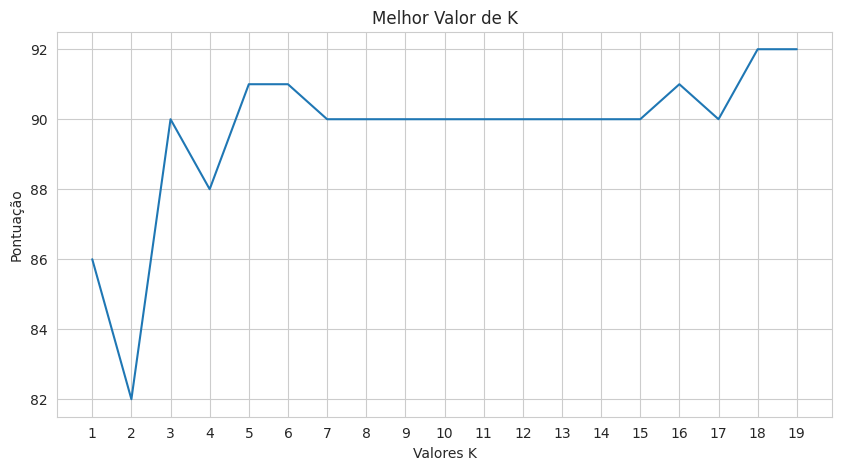

Pontuação Máxima do KNN: 92.0%


In [ ]:
# Bônus: Informação adicional
# Importação de biblioteca
import numpy as np

# Lista Pontuação
scoreList = []

# Range de K
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test).round(2)*100)

# Gráfico Valores K
plt.figure(figsize=(10,5))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.ylabel('Pontuação')
plt.xlabel('Valores K')
plt.title('Melhor Valor de K')
plt.show()

# Pontuação máxima
acc = max(scoreList)
print("Pontuação Máxima do KNN: {}%".format(acc))

Mais informações: https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model/notebook

Para outros algoritmos classificadores utilize: https://scikit-learn.org/stable/

### **Salvando o melhor modelo**

Este código salva o modelo de regressão treinado

In [ ]:
# Salvando o modelo
from joblib import dump

# Salvando o modelo treinado
dump(knn_clf, 'modelo_knn_class_cardio.joblib')

['modelo_knn_class_cardio.joblib']